# Edge Detection and High Pass Filters

To correctly handle high pass filters, one would need to ensure that the cryptosystem can handle negative values. This is accomplished through the use of an encoding scheme, specifically tailored for this application

In [1]:
from utils_encryptedDomain.homomorphic_operations import *
from utils_plaintextDomain.utils import *
# Show the figures / plots inside the notebook
%matplotlib inline

## Roberts Edge Detector

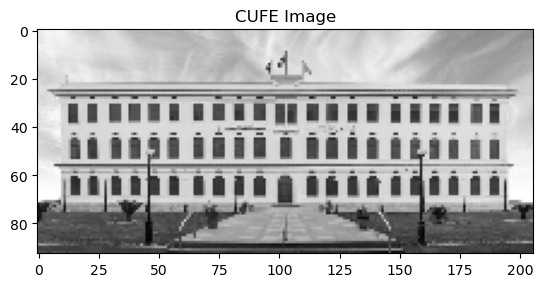

In [4]:
# Preparing the test image
cufe = io.imread("images/ex1.png")
cufe = resize(cufe, (int(cufe.shape[1] / 3), int(cufe.shape[0] / 3)), interpolation=INTER_NEAREST)
cufe = (rgb2gray(cufe) * 255).astype(np.int64)

show_images([cufe], ["CUFE Image"])


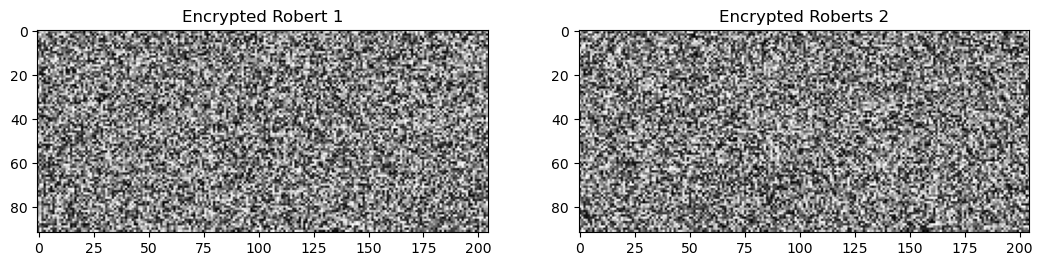

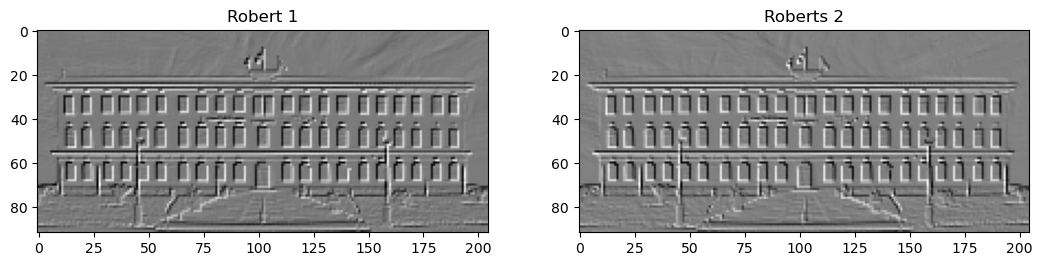

In [7]:
encryptedCUFE = encryptImage(cufe)
# Convolution
testKernel1 = np.array([[1, 0],
                        [0, -1]]).astype(np.int64)
testKernel2 = np.array([[0, 1],
                        [-1, 0]]).astype(np.int64)

# Encrypted Convolution
encryptedOutput1 = encryptedConvolve2D(encryptedCUFE, testKernel1)
encryptedOutput2 = encryptedConvolve2D(encryptedCUFE, testKernel2)

show_images([encryptedOutput1, encryptedOutput2], ["Encrypted Robert 1", "Encrypted Roberts 2"])
show_images([decryptImage(encryptedOutput1), decryptImage(encryptedOutput2)], ["Robert 1", "Roberts 2"])


## Sobel Edge Detection

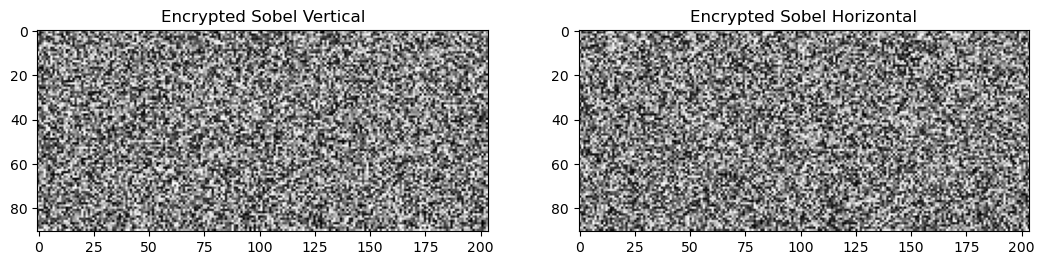

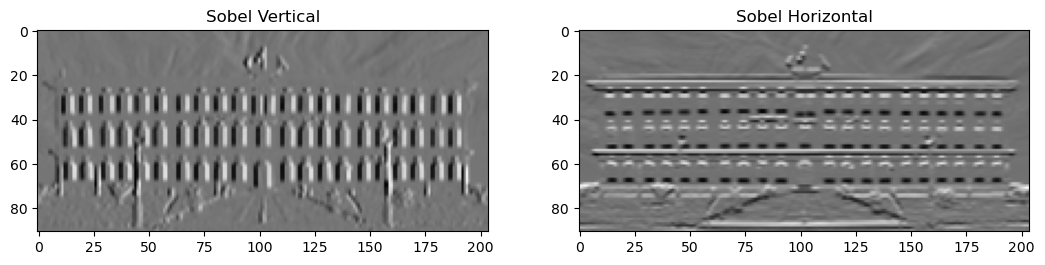

In [8]:
# Convolution
testKernel1 = np.array([[1, 0, -1],
                        [2, 0, -2],
                        [1, 0, -1]]).astype(np.int64)
testKernel2 = np.array([[-1, -2, -1],
                        [0, 0, 0],
                        [1, 2, 1]]).astype(np.int64)

# Encrypted Convolution
encryptedOutput1 = encryptedConvolve2D(encryptedCUFE, testKernel1)
encryptedOutput2 = encryptedConvolve2D(encryptedCUFE, testKernel2)

show_images([encryptedOutput1, encryptedOutput2], ["Encrypted Sobel Vertical", "Encrypted Sobel Horizontal"])
show_images([decryptImage(encryptedOutput1), decryptImage(encryptedOutput2)], ["Sobel Vertical", "Sobel Horizontal"])

As we can see, edge detection works as expected; we can now add high pass filters to our toolkit!